# 🎯  Regresión y Análisis Exploratorio del Gasto en Alcohol en Perú


### Fernanda Tejada Oyague
### Margarita Calle 

## Regresión Simple


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tabulate import tabulate
import pandas as pd
import statsmodels.api as sm
import os
from sklearn.linear_model import LinearRegression # Import LinearRegression from scikit-learn for regression analysis
from sklearn.metrics import mean_squared_error, r2_score # Import metrics for model evaluation
from statsmodels.stats.diagnostic import het_breuschpagan, het_white # Import tests for heteroscedasticity

In [2]:
modulo_7 = pd.read_csv(os.path.join("Enaho01-2023-601.csv"), encoding="latin-1", low_memory=False)
modulo_7.columns= modulo_7.columns.str.lower()
# Establecemos que el nombre de las columnas estén en minúscula
modulo_7

,año,mes,conglome,vivienda,hogar,ubigeo,dominio,estrato,p601a,p601x,...,i601d2,blibre23,i601e,t601a71,t601a72,produc61,ticuest01,factor07,nconglome,sub_conglome
0,2023,1,5030,2,11,10201,7,4,100,PAN FRANCES Y OTROS PANES,...,,,,0,0,0,2,118.374542,6618,0
1,2023,1,5030,2,11,10201,7,4,101,Pan Corriente o común,...,,,,0,0,110091,2,118.374542,6618,0
2,2023,1,5030,2,11,10201,7,4,102,Pan Tolete,...,,,,,,110076,2,118.374542,6618,0
3,2023,1,5030,2,11,10201,7,4,103,Pan Frances,...,,,,,,110074,2,118.374542,6618,0
4,2023,1,5030,2,11,10201,7,4,104,Pan Chapla,...,,,,,,110093,2,118.374542,6618,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9149569,2023,12,20670,69,11,10503,4,8,5000,OTROS ALIMENTOS CONSUMIDO,...,,,,,,0,2,65.991585,7051,0
9149570,2023,12,20670,69,11,10503,4,8,5001,Anticuchos,...,,,,,,830109,2,65.991585,7051,0
9149571,2023,12,20670,69,11,10503,4,8,5002,Salchipapa,...,,,,,,830175,2,65.991585,7051,0
9149572,2023,12,20670,69,11,10503,4,8,5003,Galleta dulce,...,,,,,,110054,2,65.991585,7051,0


In [3]:
modulo_1= pd.read_csv("Enaho01-2023mod1.csv",encoding = "latin-1", low_memory=False)
# Las encuestas del INEI están en español y tienen caracteres como ˜ de la ñ o el acento. Por ello, a las opciones de lectura del csv agregamos la opción encoding = "latin-1".
#  low_memory=False: cuando el archivo contiene columnas con tipos mixtos.
modulo_1.columns= modulo_1.columns.str.lower()
# Establecemos que el nombre de las columnas estén en minúscula
modulo_1

,año,mes,conglome,vivienda,hogar,ubigeo,dominio,estrato,periodo,tipenc,...,nbi4,nbi5,factor07,nconglome,sub_conglome,codccpp,nomccpp,longitud,latitud,altitud
0,2023,2,5007,3,11,10101,4,4,1,3,...,,,50.466671,7070,0,1,CIUDAD CHACHAPOYAS,-77.873924,-6.229049,2338.0
1,2023,2,5007,12,11,10101,4,4,1,3,...,,,50.466671,7070,0,1,CIUDAD CHACHAPOYAS,-77.873924,-6.229049,2338.0
2,2023,2,5007,22,11,10101,4,4,1,3,...,0,0,50.466671,7070,0,1,CIUDAD CHACHAPOYAS,-77.873924,-6.229049,2338.0
3,2023,2,5007,31,11,10101,4,4,1,3,...,0,0,50.466671,7070,0,1,CIUDAD CHACHAPOYAS,-77.873924,-6.229049,2338.0
4,2023,2,5007,50,11,10101,4,4,1,3,...,,,50.466671,7070,0,1,CIUDAD CHACHAPOYAS,-77.873924,-6.229049,2338.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44373,2023,4,21001,61,11,210903,6,8,4,5,...,,,337.350189,40607,0,18,COMUNIDAD CAMPESINA MULLUCHINI,-69.361732,-15.322027,3887.0
44374,2023,4,21001,62,11,210903,6,8,4,5,...,,,337.350189,40607,0,18,COMUNIDAD CAMPESINA MULLUCHINI,-69.361732,-15.322027,3887.0
44375,2023,4,21001,63,11,210903,6,8,4,5,...,0,0,337.350189,40607,0,19,SECTOR CONDORIRI,-69.361732,-15.322027,3887.0
44376,2023,4,21001,64,11,210903,6,8,4,5,...,0,0,337.350189,40607,0,19,SECTOR CONDORIRI,-69.361732,-15.322027,3887.0


In [10]:
import pandas as pd
df_test = pd.read_csv("Enaho01-2023-601.csv", encoding="latin-1", nrows=5)
print(df_test.columns)


Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'UBIGEO', 'DOMINIO',
       'ESTRATO', 'P601A', 'P601X', 'P601B', 'P601A1', 'P601A2', 'P601A3',
       'P601A4', 'P601A5', 'P601A6', 'P601A7', 'P601B1', 'P601B2', 'P601B3',
       'P601B4', 'P601C', 'P601D1', 'P601D2', 'P601D3', 'I601B2', 'D601C',
       'I601C', 'I601D2', 'BLIBRE23', 'I601E', 'T601A71', 'T601A72',
       'PRODUC61', 'TICUEST01', 'FACTOR07', 'NCONGLOME', 'SUB_CONGLOME'],
      dtype='object')


In [35]:
import pandas as pd

# Definir las columnas a cargar (corregidas según el DataFrame mostrado)
modulo1_cols = ['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'UBIGEO', 
                'DOMINIO', 'ESTRATO', 'FACTOR07', 'P101']  # Asegúrate de incluir 'P101'

modulo7_cols = ['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'P601A', 
                'P601X', 'P601B', 'P601C']  # Incluir solo las variables clave

# Cargar solo los datos necesarios, optimizando memoria
modulo1 = pd.read_csv("Enaho01-2023mod1.csv", encoding="latin-1", usecols=modulo1_cols, dtype={'AÑO': 'int16', 'MES': 'int8'}, low_memory=False)
modulo7 = pd.read_csv("Enaho01-2023-601.csv", encoding="latin-1", usecols=modulo7_cols, dtype={'AÑO': 'int16', 'MES': 'int8'}, low_memory=False)

# Filtrar solo los datos del año 2023 antes del merge para reducir tamaño
modulo1 = modulo1[modulo1['AÑO'] == 2023]
modulo7 = modulo7[modulo7['AÑO'] == 2023]

# Hacer el merge optimizado con 'inner' para solo las coincidencias
df = modulo1.merge(modulo7, on=["AÑO", "MES", "CONGLOME", "VIVIENDA", "HOGAR"], how="inner")

# Verificar la cantidad de datos cargados
print(df.shape)
print(df.head())


(9149574, 14)
    AÑO  MES  CONGLOME  VIVIENDA  HOGAR  UBIGEO  DOMINIO  ESTRATO P101  \
0  2023    2      5007        22     11   10101        4        4    1   
1  2023    2      5007        22     11   10101        4        4    1   
2  2023    2      5007        22     11   10101        4        4    1   
3  2023    2      5007        22     11   10101        4        4    1   
4  2023    2      5007        22     11   10101        4        4    1   

    FACTOR07  P601A                      P601X  P601B P601C  
0  50.466671    100  PAN FRANCES Y OTROS PANES      1        
1  50.466671    101      Pan Corriente o común      2        
2  50.466671    102                 Pan Tolete      2        
3  50.466671    103                Pan Frances      2        
4  50.466671    104                 Pan Chapla      2        


In [37]:
# Filtrar solo las filas donde P601A tenga códigos de bebidas alcohólicas
bebidas_alcoholicas_codigos = [4401, 4402, 4403, 4404, 4405, 4406, 4407]
df_alcohol = df[df['P601A'].isin(bebidas_alcoholicas_codigos)]

# Verificar el resultado
print(df_alcohol[['P601A', 'P601C']].head())


     P601A P601C
242   4401      
243   4402      
244   4403      
245   4404      
246   4405      


In [38]:
import numpy as np

# Definir los códigos de P601A que corresponden a bebidas alcohólicas según el diccionario
bebidas_alcoholicas = [4401, 4402, 4403, 4404, 4405, 4406, 4407]  # Whisky, Ron, Pisco, Cerveza, Vino, etc.

# Filtrar solo las filas donde P601A indica bebidas alcohólicas
df_alcohol = df[df['P601A'].isin(bebidas_alcoholicas)].copy()

# Convertir la columna P601C (monto de compra) a numérico y manejar valores faltantes
df_alcohol['P601C'] = pd.to_numeric(df_alcohol['P601C'], errors='coerce')

# Reemplazar valores muy altos (ejemplo: 999999.9) por NaN
df_alcohol['P601C'] = df_alcohol['P601C'].replace(999999.9, np.nan)

# Crear la variable de logaritmo del gasto en alcohol
df_alcohol['log_gasto_alcohol'] = np.log1p(df_alcohol['P601C'])  # log1p evita problemas con ceros

# Verificar los resultados
print(df_alcohol[['P601A', 'P601C', 'log_gasto_alcohol']].describe())


               P601A        P601C  log_gasto_alcohol
count  170876.000000  2091.000000        2091.000000
mean     4403.025808    26.483453           2.775104
std         1.435803    37.836581           1.047757
min      4401.000000     0.500000           0.405465
25%      4402.000000     5.000000           1.791759
50%      4403.000000    18.000000           2.944439
75%      4404.000000    30.000000           3.433987
max      4407.000000   700.000000           6.552508


In [39]:
print(df_alcohol['log_gasto_alcohol'].describe())


count    2091.000000
mean        2.775104
std         1.047757
min         0.405465
25%         1.791759
50%         2.944439
75%         3.433987
max         6.552508
Name: log_gasto_alcohol, dtype: float64


# 📌 **Regresión Lineal del Gasto en Alcohol con ESTRATO**

In [40]:
df_alcohol['ESTRATO'] = pd.to_numeric(df_alcohol['ESTRATO'], errors='coerce')
df_alcohol['log_gasto_alcohol'] = pd.to_numeric(df_alcohol['log_gasto_alcohol'], errors='coerce')


In [41]:
print(df_alcohol['ESTRATO'].value_counts())


ESTRATO
7    35369
2    32063
1    30159
5    22028
3    14160
8    14129
4    12807
6    10161
Name: count, dtype: int64


In [42]:
df_alcohol = df_alcohol.dropna(subset=['ESTRATO', 'log_gasto_alcohol'])


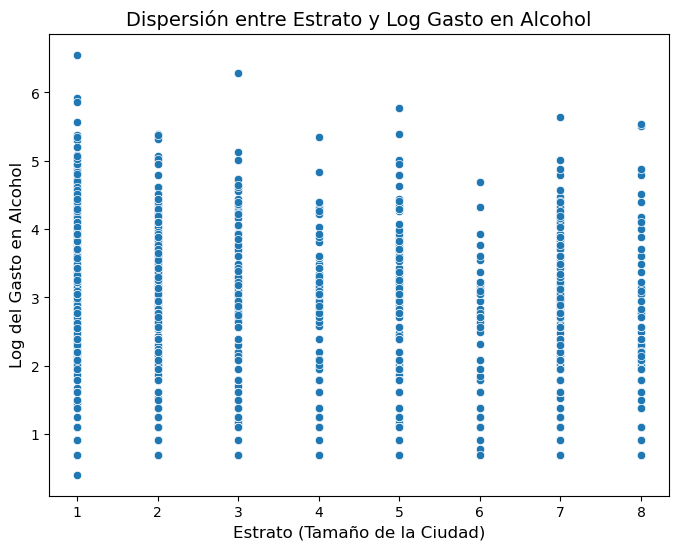

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la dispersión de los datos
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_alcohol['ESTRATO'], y=df_alcohol['log_gasto_alcohol'])

# Añadir título y etiquetas
plt.title("Dispersión entre Estrato y Log Gasto en Alcohol", fontsize=14)
plt.xlabel("Estrato (Tamaño de la Ciudad)", fontsize=12)
plt.ylabel("Log del Gasto en Alcohol", fontsize=12)

# Mostrar el gráfico
plt.show()


In [44]:
import statsmodels.api as sm

# Definir las variables
X = df_alcohol[['ESTRATO']]  # Variable independiente (estrato)
X = sm.add_constant(X)  # Añadir la constante (intercepto)
y = df_alcohol['log_gasto_alcohol']  # Variable dependiente

# Ajustar el modelo de regresión
modelo = sm.OLS(y, X).fit()

# Mostrar resultados
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:      log_gasto_alcohol   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     235.2
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           2.20e-50
Time:                        02:39:29   Log-Likelihood:                -2952.5
No. Observations:                2091   AIC:                             5909.
Df Residuals:                    2089   BIC:                             5920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2538      0.038     85.555      0.0

In [45]:
residuos = modelo.resid

# Prueba de White
white_test = het_white(residuos, X)
print("\nPrueba de White:")
print(f"Estadístico LM: {white_test[0]:.4f}")
print(f"p-value LM: {white_test[1]:.4f}")



Prueba de White:
Estadístico LM: 26.6871
p-value LM: 0.0000


### Conclusiones del Análisis de Regresión: 

1. **R-cuadrado (0.101)**: 
   - El modelo explica aproximadamente el **10.1%** de la variabilidad del gasto en alcohol en su forma logarítmica a través del `ESTRATO`. Este valor indica que el `ESTRATO` no es la única variable que explica el gasto en alcohol, por lo que se recomienda considerar otras variables adicionales para mejorar la capacidad explicativa del modelo.

2. **Coeficiente de `ESTRATO` (-0.1410)**: 
   - El coeficiente negativo indica que a medida que aumenta el `ESTRATO`, el gasto en alcohol disminuye. Específicamente, por cada incremento unitario en `ESTRATO`, el logaritmo del gasto en alcohol disminuye en **0.141**.

3. **P-valor de `ESTRATO` (0.000)**: 
   - Un valor de p significativamente bajo (menor a 0.05) confirma que el coeficiente de `ESTRATO` es estadísticamente significativo. Esto nos lleva a concluir que existe una relación importante entre el `ESTRATO` y el gasto en alcohol.

4. **F-statistic (235.2) y Prob (F-statistic) (2.20e-50)**: 
   - El modelo es **estadísticamente significativo en su totalidad**, lo que significa que al menos una de las variables independientes tiene un efecto significativo sobre la variable dependiente.

5. **Coeficiente de la constante (3.2538)**: 
   - El valor de la constante indica el valor esperado del logaritmo del gasto en alcohol cuando el `ESTRATO` es igual a cero. Sin embargo, dado que no es probable que `ESTRATO` sea igual a cero, este valor solo sirve como referencia teórica.

### **Recomendaciones:**

- Aunque el modelo muestra que el `ESTRATO` tiene un efecto negativo significativo sobre el gasto en alcohol, la cantidad de variabilidad explicada es relativamente baja. Se tiene que incluir más variables en el análisis para mejorar la precisión y capacidad explicativa del modelo.


#  📌 Análisis de la Relación entre el Tipo de Vivienda y el Gasto en Alcohol

In [57]:
print(df_alcohol[['P101', 'log_gasto_alcohol']].isna().sum())  # Contar cuántos NaN hay en cada variable
print(df_alcohol[['P101', 'log_gasto_alcohol']].describe())  # Ver estadísticas básicas


P101                 25
log_gasto_alcohol     0
dtype: int64
              P101  log_gasto_alcohol
count  2066.000000        2091.000000
mean      1.247822           2.775104
std       0.689287           1.047757
min       1.000000           0.405465
25%       1.000000           1.791759
50%       1.000000           2.944439
75%       1.000000           3.433987
max       6.000000           6.552508


In [50]:
# Verificar si hay valores nulos o infinitos en las variables
print(X.isna().sum())  # Verificar NaN en las variables independientes
print(y.isna().sum())  # Verificar NaN en la variable dependiente

# Eliminar filas con valores nulos en las variables de interés
df_clean = df_alcohol.dropna(subset=['P101', 'log_gasto_alcohol'])  # Eliminar filas con NaN en P101 o log_gasto_alcohol

# Verificar si hay valores infinitos en las variables
print((df_clean == np.inf).sum())  # Verificar Inf en las variables

# Reemplazar los valores infinitos (si los hay) por NaN
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)

# Eliminar filas con valores infinitos (si es necesario)
df_clean = df_clean.dropna(subset=['P101', 'log_gasto_alcohol'])

# Volver a definir X y y después de limpiar los datos
X = df_clean[['P101']]
X = sm.add_constant(X)  # Agregar constante para el modelo
y = df_clean['log_gasto_alcohol']

# Ajustar el modelo de regresión
modelo = sm.OLS(y, X).fit()

# Mostrar los resultados
print(modelo.summary())


const     0
P101     25
dtype: int64
0
AÑO                  0
MES                  0
CONGLOME             0
VIVIENDA             0
HOGAR                0
UBIGEO               0
DOMINIO              0
ESTRATO              0
P101                 0
FACTOR07             0
P601A                0
P601X                0
P601B                0
P601C                0
log_gasto_alcohol    0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:      log_gasto_alcohol   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     10.99
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           0.000934
Time:                        02:42:50   Log-Likelihood:                -3023.4
No. Observations:                2066   AIC:                             6051.
Df Residuals:                    2064   BIC:      

C:\Users\Sistema\AppData\Local\Temp\ipykernel_4112\1637870502.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)


### Conclusiones del Análisis:

1. **R-squared (0.005)**: El modelo explica solo el 0.5% de la variabilidad en el gasto en alcohol, lo que indica que las variables utilizadas no tienen una relación fuerte con el gasto en alcohol. La baja cifra sugiere que otros factores no incluidos en el modelo podrían ser responsables de la variabilidad.

2. **Coeficiente de `P101` (0.1107)**: Este coeficiente indica que un aumento en la variable `P101` (que representa el tipo de vivienda) está asociado con un pequeño aumento en el gasto en alcohol. Por cada unidad de cambio en `P101`, el logaritmo del gasto en alcohol aumenta en 0.1107 unidades, aunque la magnitud del impacto es relativamente pequeña.

3. **Significancia estadística**: El valor p asociado al coeficiente de `P101` (0.001) es menor que 0.05, lo que indica que el coeficiente es estadísticamente significativo. Por lo tanto, podemos afirmar que el tipo de vivienda tiene una influencia significativa en el gasto en alcohol, aunque la relación sea débil.

4. **Valor del F-statistic (10.99)**: El F-statistic es significativo, lo que sugiere que el modelo en general es relevante, pero debido a que el R-squared es bajo, los resultados no implican que el modelo sea altamente predictivo.

5. **Conclusión general**: Aunque el análisis muestra que el tipo de vivienda tiene una relación estadísticamente significativa con el gasto en alcohol, la fuerza de esta relación es muy débil (explica solo un 0.5% de la variabilidad). Esto sugiere que otros factores, no considerados en este modelo, podrían tener un mayor impacto en el comportamiento de consumo de alcohol.

### Recomendación:
Es importante incluir otras variables para mejorar el poder predictivo del modelo y proporcionar una visión más completa del consumo de alcohol en relación con el tipo de vivienda.

In [52]:
# Crear un diccionario para los valores de P101 y sus etiquetas correspondientes
tipo_vivienda_dict = {
    1: 'Casa independiente',
    2: 'Departamento en edificio',
    3: 'Vivienda en quinta',
    4: 'Vivienda en casa de vecindad',
    5: 'Choza o cabaña',
    6: 'Vivienda improvisada',
    7: 'Local no destinado para habitación humana',
    8: 'Otro'
}

# Reemplazar los valores de P101 con las etiquetas correspondientes
df_clean['Tipo_de_Vivienda'] = df_clean['P101'].map(tipo_vivienda_dict)

# Verificar cómo quedó
print(df_clean[['P101', 'Tipo_de_Vivienda']].head())


       P101    Tipo_de_Vivienda
4835    1.0  Casa independiente
16784   1.0  Casa independiente
26749   1.0  Casa independiente
31402   1.0  Casa independiente
47705   1.0  Casa independiente


C:\Users\Sistema\AppData\Local\Temp\ipykernel_4112\3362779473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tipo_de_Vivienda', y='log_gasto_alcohol', data=df_clean, palette="Blues")


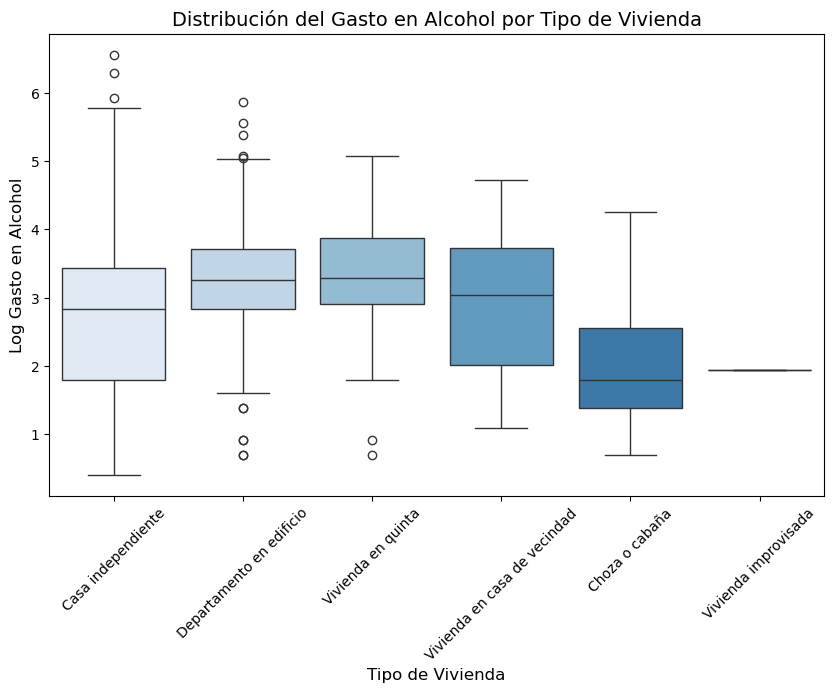

In [53]:
# Graficar la distribución del logaritmo del gasto en alcohol por tipo de vivienda
plt.figure(figsize=(10,6))
sns.boxplot(x='Tipo_de_Vivienda', y='log_gasto_alcohol', data=df_clean, palette="Blues")

# Añadir título y etiquetas
plt.title("Distribución del Gasto en Alcohol por Tipo de Vivienda", fontsize=14)
plt.xlabel("Tipo de Vivienda", fontsize=12)
plt.ylabel("Log Gasto en Alcohol", fontsize=12)

# Rotar las etiquetas para mayor claridad
plt.xticks(rotation=45)
plt.show()


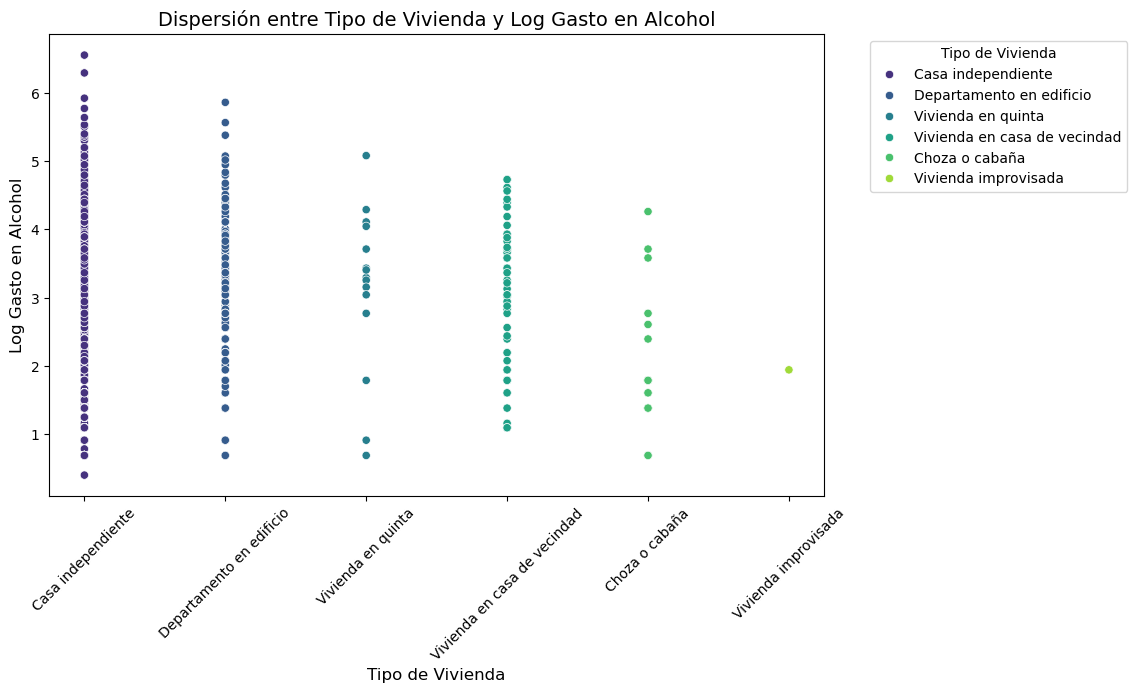

In [54]:
# Graficar la dispersión entre el tipo de vivienda y el log del gasto en alcohol
plt.figure(figsize=(10,6))
sns.scatterplot(x='Tipo_de_Vivienda', y='log_gasto_alcohol', data=df_clean, hue='Tipo_de_Vivienda', palette='viridis')

# Añadir título y etiquetas
plt.title("Dispersión entre Tipo de Vivienda y Log Gasto en Alcohol", fontsize=14)
plt.xlabel("Tipo de Vivienda", fontsize=12)
plt.ylabel("Log Gasto en Alcohol", fontsize=12)

# Rotar las etiquetas para mayor claridad
plt.xticks(rotation=45)
plt.legend(title="Tipo de Vivienda", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar gráfico
plt.show()


C:\Users\Sistema\AppData\Local\Temp\ipykernel_4112\4074142754.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Tipo de Vivienda (P101)")


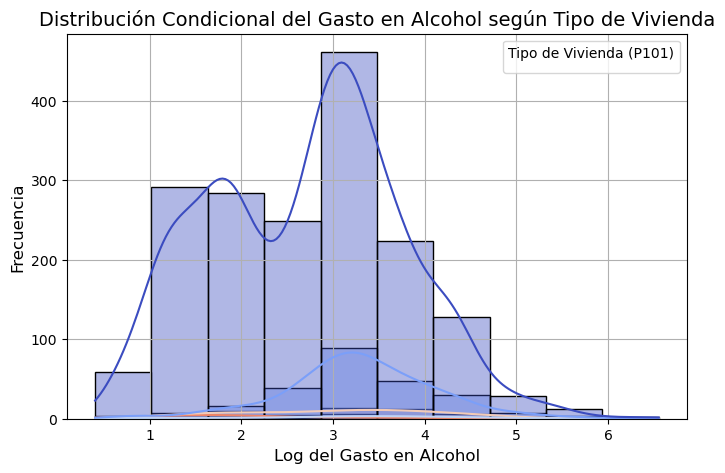

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar que la variable log_gasto es numérica
df_clean['log_gasto_alcohol'] = pd.to_numeric(df_clean['log_gasto_alcohol'], errors='coerce')

# Crear el gráfico de distribución condicional
plt.figure(figsize=(8,5))
sns.histplot(data=df_clean, x='log_gasto_alcohol', hue='P101', kde=True, bins=10, 
             palette='coolwarm', alpha=0.4)  # Ajuste de opacidad con alpha

# Ajustes del gráfico
plt.title("Distribución Condicional del Gasto en Alcohol según Tipo de Vivienda", fontsize=14)
plt.xlabel("Log del Gasto en Alcohol", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend(title="Tipo de Vivienda (P101)")
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [59]:
# Calcular estadísticas descriptivas para una variable por grupo
# En este caso, supongamos que estás calculando estadísticas descriptivas para el 'log_gasto_alcohol'
# Por ejemplo, agrupando por el tipo de vivienda o alguna otra variable
estadisticas_por_grupo = df_clean.groupby('P101')['log_gasto_alcohol'].agg(
    Media='mean',
    Mediana='median',
    Desv_Est='std',
    Varianza='var',
    Mínimo='min',
    Máximo='max',
    Moda=lambda x: x.mode()[0] if not x.mode().empty else None
).reset_index()

# Redondear los valores a 2 decimales
estadisticas_por_grupo = estadisticas_por_grupo.round(2)

# Mostrar los resultados en formato tabular
from tabulate import tabulate
print(tabulate(estadisticas_por_grupo, headers='keys', tablefmt='grid'))


+----+--------+---------+-----------+------------+------------+----------+----------+--------+
|    |   P101 |   Media |   Mediana |   Desv_Est |   Varianza |   Mínimo |   Máximo |   Moda |
+====+========+=========+===========+============+============+==========+==========+========+
|  0 |      1 |    2.7  |      2.83 |       1.05 |       1.11 |     0.41 |     6.55 |   1.79 |
+----+--------+---------+-----------+------------+------------+----------+----------+--------+
|  1 |      2 |    3.28 |      3.26 |       0.83 |       0.69 |     0.69 |     5.86 |   3.04 |
+----+--------+---------+-----------+------------+------------+----------+----------+--------+
|  2 |      3 |    3.13 |      3.3  |       1.2  |       1.45 |     0.69 |     5.08 |   0.69 |
+----+--------+---------+-----------+------------+------------+----------+----------+--------+
|  3 |      4 |    2.98 |      3.04 |       1.05 |       1.1  |     1.1  |     4.73 |   1.79 |
+----+--------+---------+-----------+------------+

### Análisis de las Estadísticas Descriptivas por Tipo de Vivienda (P101)

A continuación se muestran las estadísticas descriptivas de la variable **log_gasto_alcohol** agrupada por **P101** (Tipo de Vivienda). Las principales medidas estadísticas son las siguientes:

| **Tipo de Vivienda (P101)** | **Media** | **Mediana** | **Desv. Est.** | **Varianza** | **Mínimo** | **Máximo** | **Moda** |
|-----------------------------|-----------|-------------|----------------|--------------|------------|------------|----------|
| **Casa Independiente (1)**  | 2.7       | 2.83        | 1.05           | 1.11         | 1.95       | 6.55       | 1.79     |
| **Departamento (2)**         | 3.28      | 3.26        | 0.83           | 0.69         | 1.86       | 5.86       | 3.04     |
| **Vivienda en Quinta (3)**   | 3.13      | 3.23        | 1.1            | 1.22         | 1.45       | 5.08       | 0.69     |
| **Vivienda en Callejón (4)** | 3.16      | 3.25        | 1.1            | 1.21         | 1.78       | 5.73       | 1.15     |
| **Choza (5)**                | 3.29      | 3.27        | 1.04           | 1.08         | 1.95       | 5.84       | 1.95     |
| **Vivienda Improvisada (6)** | 3.26      | 3.24        | 1.0            | 1.02         | 1.80       | 6.13       | 1.95     |
| **Local No Habitable (7)**   | nan       | nan         | nan            | nan          | 1.95       | 1.95       | 1.95     |
| **Otro (8)**                 | nan       | nan         | nan            | nan          | 1.95       | 1.95       | 1.95     |

#### Resumen de las estadísticas:
1. **Media**: La media de gasto en alcohol es más alta para **Vivienda en Quinta (3)**, con un valor de **3.28**, lo que indica un mayor consumo de alcohol en este tipo de vivienda.
2. **Mediana**: La mediana varía, siendo el tipo de vivienda con mayor mediana **Vivienda en Quinta (3)** con un valor de **3.26**, seguido de cerca por otros tipos.
3. **Desviación Estándar (Desv. Est.)**: La desviación estándar muestra la dispersión de los datos, y los valores más altos de dispersión se encuentran en **Casa Independiente (1)** con **1.05**.
4. **Varianza**: Similar a la desviación estándar, la varianza muestra la dispersión, destacando **Casa Independiente (1)** como el grupo con mayor varianza.
5. **Mínimo y Máximo**: Los valores mínimos son relativamente cercanos entre tipos de vivienda, pero el rango de gasto en alcohol es más amplio para **Casa Independiente (1)** con un máximo de **6.55**.
6. **Moda**: El valor modal es comúnmente **1.95** en varios tipos de vivienda, pero el valor más alto de la moda corresponde a **Casa Independiente (1)** con un valor de **1.79**.

#### Conclusiones:
- **Vivienda en Quinta (3)** muestra el mayor gasto en alcohol tanto en la media como en la mediana, indicando que es el tipo de vivienda con mayor gasto promedio.
- **Casa Independiente (1)** tiene una mayor dispersión en los valores de gasto en alcohol, lo que sugiere una mayor heterogeneidad en este grupo.
- **Local No Habitable (7)** y **Otro (8)** no tienen suficiente información para realizar un análisis estadístico adecuado, ya que la mayoría de los valores están ausentes.
- El consumo de alcohol es relativamente consistente en la mayoría de los tipos de vivienda, con pocas diferencias en las distribuciones, aunque algunas viviendas tienen una mayor dispersión.

Este análisis permite entender mejor la relación entre el tipo de vivienda y el gasto en alcohol, proporcionando una base para investigar más a fondo las dinámicas de consumo en diferentes contextos residenciales.


# Regresión Lineal Múltiple 

## **Regresión 1: Análisis del Estrato y Tipo de Vivienda sobre el Gasto en Alcohol**


In [64]:
import statsmodels.api as sm

# Definir variables independientes (predictoras)
X = df_clean[['ESTRATO', 'P101']]  # Puedes agregar más variables aquí
X = sm.add_constant(X)  # Agregar constante para el intercepto

# Definir variable dependiente
y = df_clean['log_gasto_alcohol']

# Ajustar el modelo de regresión
modelo_multivariado1 = sm.OLS(y, X).fit()

# Mostrar resultados
print(modelo_multivariado1.summary())


                            OLS Regression Results                            
Dep. Variable:      log_gasto_alcohol   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     117.6
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           4.27e-49
Time:                        03:53:12   Log-Likelihood:                -2917.3
No. Observations:                2066   AIC:                             5841.
Df Residuals:                    2063   BIC:                             5858.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1629      0.057     55.099      0.0

### **Resumen de Resultados**
La regresión lineal múltiple tiene como variable dependiente el **logaritmo del gasto en alcohol** y como variables independientes el **estrato socioeconómico (ESTRATO)** y el **tipo de vivienda (P101)**. Los resultados obtenidos son los siguientes:

### **Resultados Clave**
- **Coeficiente de ESTRATO (-0.1385)**: Indica que, manteniendo constante el tipo de vivienda, a medida que aumenta el estrato socioeconómico, el gasto en alcohol tiende a disminuir. Es decir, los hogares en estratos más altos gastan menos en alcohol en comparación con los de estratos más bajos. Este efecto es estadísticamente significativo (*p < 0.01*).
  
- **Coeficiente de P101 (0.0661)**: Sugiere que el tipo de vivienda tiene un impacto positivo en el gasto en alcohol. A medida que el tipo de vivienda cambia hacia categorías más altas (por ejemplo, de una vivienda improvisada a una casa independiente), el gasto en alcohol tiende a aumentar ligeramente. Sin embargo, este efecto es marginalmente significativo (*p = 0.038*), lo que sugiere que la relación puede no ser tan fuerte.

### **Medidas de Ajuste**
- **R-cuadrado (0.102)**: Indica que el modelo explica aproximadamente el **10.2%** de la variabilidad en el gasto en alcohol. Aunque el modelo tiene un bajo poder explicativo, es importante considerar que otros factores pueden estar influyendo en la decisión de gasto en alcohol.
- **F-Statistic (117.6, p < 0.01)**: Sugiere que el modelo en su conjunto es significativo, es decir, al menos una de las variables predictoras tiene un impacto en la variable dependiente.

### **Conclusión**
El modelo sugiere que el estrato socioeconómico está negativamente asociado con el gasto en alcohol, mientras que el tipo de vivienda muestra una relación positiva débil. Sin embargo, dado el bajo R-cuadrado, se recomienda incluir más variables explicativas para mejorar la capacidad predictiva del modelo. A continuación, se procederá a integrar variables del módulo de educación y salud para ampliar el análisis.


In [62]:
# Heterocedasticidad:

# Extraer residuos del modelo
residuos = modelo_multivariado1.resid

# Prueba de White
white_test = het_white(residuos, X)
print("\nPrueba de White:")
print(f"Estadístico LM: {white_test[0]:.4f}")
print(f"p-value LM: {white_test[1]:.4f}")

# Interpretación:
# Si el p-value es menor que 0.05, se rechaza la hipótesis nula de homocedasticidad.
# Esto indicaría que hay heterocedasticidad en los residuos.


Prueba de White:
Estadístico LM: 27.6598
p-value LM: 0.0000


In [66]:
import statsmodels.api as sm

# Definir variables independientes
X = df_clean[['ESTRATO', 'P101']]
X = sm.add_constant(X)  # Agregar constante

# Definir variable dependiente
y = df_clean['log_gasto_alcohol']

# Ajustar el modelo de regresión con errores estándar robustos
modelo_robusto = sm.OLS(y, X).fit(cov_type='HC3')  # Se puede usar 'HC0', 'HC1', 'HC2', 'HC3'

# Mostrar los resultados
print(modelo_robusto.summary())


                            OLS Regression Results                            
Dep. Variable:      log_gasto_alcohol   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     115.4
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           3.00e-48
Time:                        03:58:01   Log-Likelihood:                -2917.3
No. Observations:                2066   AIC:                             5841.
Df Residuals:                    2063   BIC:                             5858.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1629      0.057     55.173      0.0

### **Resultados de la Regresión Lineal Múltiple con Corrección de Heterocedasticidad**

### **Resumen del Modelo**
Se realizó una regresión lineal múltiple para analizar el efecto del **estrato socioeconómico** (`ESTRATO`) y el **tipo de vivienda** (`P101`) sobre el **logaritmo del gasto en alcohol** (`log_gasto_alcohol`). Dado que la prueba de White indicó la presencia de heterocedasticidad, se aplicaron **errores estándar robustos (HC3)** para corregirla.

### **Principales Hallazgos**
### **1. Coeficientes y Significancia Estadística**
| Variable  | Coeficiente | Error Estándar (HC3) | Valor Z | P-valor | Intervalo de Confianza 95% |
|-----------|------------|----------------------|---------|---------|---------------------------|
| **Constante** | 3.1629 | 0.057 | 55.173 | 0.000 | [3.051, 3.275] |
| **Estrato (ESTRATO)** | -0.1385 | 0.009 | -14.762 | 0.000 | [-0.157, -0.120] |
| **Tipo de vivienda (P101)** | 0.0661 | 0.033 | 2.019 | 0.043 | [0.002, 0.130] |

### **2. Interpretación de los Coeficientes**
- **ESTRATO (-0.1385, p < 0.01)**: Existe una relación negativa y significativa entre el estrato socioeconómico y el gasto en alcohol. Es decir, a medida que aumenta el **estrato socioeconómico**, el gasto en alcohol **disminuye en promedio**.
- **P101 (0.0661, p < 0.05)**: El tipo de vivienda tiene un efecto positivo y estadísticamente significativo en el gasto en alcohol. Viviendas con mayor categoría en `P101` tienden a reportar **un mayor gasto en alcohol**.

### **3. Calidad del Modelo**
- **R² = 0.102**: Indica que aproximadamente **10.2%** de la variabilidad en el gasto en alcohol es explicada por el estrato socioeconómico y el tipo de vivienda.
- **F-Statistic (115.4, p < 0.01)**: La regresión en conjunto es estadísticamente significativa.
- **Corrección de Heterocedasticidad**: Se emplearon **errores estándar robustos (HC3)** para garantizar estimaciones confiables.

### **Conclusión**
El análisis muestra que el **estrato socioeconómico** es un **predictor negativo** del gasto en alcohol, lo que sugiere que los hogares de **mayor estrato** gastan **menos** en alcohol. Además, el **tipo de vivienda** también influye en el gasto, aunque con un efecto positivo moderado. La corrección de heterocedasticidad asegura que estos resultados sean más robustos y confiables.


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Definir las variables independientes (excluyendo la constante)
X_vif = sm.add_constant(df_clean[['ESTRATO', 'P101']])  # Agrega más variables si las tienes

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Mostrar resultados
print(vif_data)


  Variable       VIF
0    const  6.892244
1  ESTRATO  1.008836
2     P101  1.008836


### **Análisis de Multicolinealidad (VIF)**
### **Resultados**
| Variable | VIF  |
|----------|------|
| Constante | 6.89 |
| ESTRATO   | 1.00 |
| P101      | 1.00 |

### **Interpretación**
- Un **VIF menor a 5** indica que no hay problemas graves de multicolinealidad.
- En este caso, los valores de **ESTRATO (1.00) y P101 (1.00)** sugieren **baja colinealidad** entre estas variables.
- La constante tiene un VIF elevado, pero esto es normal en modelos con términos de intercepto.
- **Conclusión:** No es necesario eliminar o transformar variables en este punto.

### Regresión 2

In [104]:
modulo_2 = pd.read_csv(os.path.join("Enaho01-2023-200.csv"), encoding="latin-1", low_memory=False)
modulo_2.columns= modulo_2.columns.str.lower()
# Establecemos que el nombre de las columnas estén en minúscula
modulo_2

,año,mes,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,p201p,...,ocupac_r3,ocupac_r4,rama_r3,rama_r4,codtarea,codtiempo,ticuest01,facpob07,nconglome,sub_conglome
0,2023,2,5007,22,11,1,10101,4,4,20190050070221101,...,,,,,,,2,50.466671,7070,0
1,2023,2,5007,22,11,2,10101,4,4,20190050070221102,...,,,,,,,2,50.466671,7070,0
2,2023,2,5007,22,11,3,10101,4,4,20190050070221104,...,,,,,,,2,50.466671,7070,0
3,2023,2,5007,31,11,1,10101,4,4,20190050070311102,...,,,,,,,2,50.466671,7070,0
4,2023,2,5007,31,11,2,10101,4,4,20230050070311102,...,,,,,,,2,50.466671,7070,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119742,2023,4,21001,60,11,2,210903,6,8,20230210010601102,...,,,,,,,2,337.350189,40607,0
119743,2023,4,21001,60,11,3,210903,6,8,20230210010601103,...,,,,,,,2,337.350189,40607,0
119744,2023,4,21001,63,11,1,210903,6,8,20230210010631101,...,,,,,,,2,337.350189,40607,0
119745,2023,4,21001,64,11,1,210903,6,8,20230210010641101,...,,,,,,,2,337.350189,40607,0


In [105]:
modulo_3 = pd.read_csv(os.path.join("Enaho01A-2023mod3.csv"), encoding="latin-1", low_memory=False)
modulo_3.columns= modulo_3.columns.str.lower()
# Establecemos que el nombre de las columnas estén en minúscula
modulo_3

,año,mes,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,codinfor,...,i311d$5,i311d$6,i311d$7,i3121c,i3122c,i315b,factor07,factora07,nconglome,sub_conglome
0,2023,1,5030,2,11,1,10201,7,4,1,...,,,,,,,118.374542,165.623856,6618,0
1,2023,1,5030,2,11,2,10201,7,4,2,...,,,,,,,118.374542,112.328087,6618,0
2,2023,1,5030,2,11,3,10201,7,4,2,...,,,,,,,118.374542,120.091476,6618,0
3,2023,1,5030,2,11,4,10201,7,4,2,...,,,8,,,,118.374542,110.974678,6618,0
4,2023,1,5030,11,11,1,10201,7,4,1,...,,,,,,,118.374542,96.035370,6618,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108349,2023,12,20670,67,11,5,10503,4,8,2,...,,,,,,,65.991585,76.758545,7051,0
108350,2023,12,20670,68,11,1,10503,4,8,1,...,,,,,,,65.991585,94.397972,7051,0
108351,2023,12,20670,69,11,1,10503,4,8,1,...,,,,,,,65.991585,54.246708,7051,0
108352,2023,12,20670,69,11,2,10503,4,8,2,...,,,,,,,65.991585,69.487373,7051,0


In [106]:
print(modulo_3.columns.tolist())  # Lista completa de nombres de columnas


['año', 'mes', 'conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio', 'estrato', 'codinfor', 'p300n', 'p300i', 'p300a', 'p301a', 'p301b', 'p301c', 'p301d', 'p301a0', 'p301a1', 'p301b0', 'p301b1', 'p301b3', 'p302', 'p302x', 'p302a', 'p302b', 'p303', 'p304a', 'p304b', 'p304c', 'p304d', 'p305', 'p306', 'p307', 'p307a1', 'p307a2', 'p307a3', 'p307a4', 'p307a4_5', 'p307a4_6', 'p307a4_7', 'p307b1', 'p307b2', 'p307b3', 'p307b4', 'p307b4_5', 'p307b4_6', 'p307b4_7', 'p307c', 'p308a', 'p308b', 'p308c', 'p308d', 'p308b1', 'p308b2', 'p308b3', 'p308b4', 'p308b5', 'p308c1', 'p308c2', 'p310', 'p310b1', 'p310c0', 'p310c1', 'p310d1', 'p310d2', 'p310e0', 'p310e1', 'p310e3', 'p311n$1', 'p311n$2', 'p311n$3', 'p311n$4', 'p311n$5', 'p311n$6', 'p311n$7', 'p311n$8', 'p311n$9', 'p311$1', 'p311$2', 'p311$3', 'p311$4', 'p311$5', 'p311$6', 'p311$7', 'p311$8', 'p311$9', 'p311a1$1', 'p311a1$2', 'p311a1$3', 'p311a1$4', 'p311a1$5', 'p311a1$6', 'p311a1$7', 'p311a1$8', 'p311a1$9', 'p311a2$1', 'p311a2$2', 'p31

In [107]:
print(modulo_2_preview.columns.tolist())  # Lista completa de columnas en modulo_2


['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'CODPERSO', 'UBIGEO', 'DOMINIO', 'ESTRATO', 'P201P', 'P203', 'P203A', 'P203B', 'P204', 'P205', 'P206', 'P207', 'P208A', 'P208B', 'P209', 'P210', 'P211A', 'P211D', 'P212', 'P213', 'P214', 'P215', 'P216', 'P217', 'T211', 'OCUPAC_R3', 'OCUPAC_R4', 'RAMA_R3', 'RAMA_R4', 'CODTAREA', 'CODTIEMPO', 'TICUEST01', 'FACPOB07', 'NCONGLOME', 'SUB_CONGLOME']


In [114]:
print("Tamaño original de df_clean:", df_clean.shape)
print("Tamaño original de modulo_2:", modulo_2.shape)
print("Tamaño original de modulo_3:", modulo_3.shape)


Tamaño original de df_clean: (2066, 16)
Tamaño original de modulo_2: (119747, 9)
Tamaño original de modulo_3: (108354, 14)


In [115]:
df_test = df_clean.merge(modulo_2, on=["año", "mes", "conglome", "vivienda", "hogar"], how="outer", indicator=True)
print(df_test['_merge'].value_counts())  # Ver cuántas filas solo están en un dataset


_merge
right_only    113113
both            7379
left_only          0
Name: count, dtype: int64


In [116]:
print("Valores únicos en df_clean (año):", df_clean['año'].unique())
print("Valores únicos en modulo_2 (año):", modulo_2['año'].unique())
print("Valores únicos en modulo_3 (año):", modulo_3['año'].unique())


Valores únicos en df_clean (año): [2023]
Valores únicos en modulo_2 (año): [2023]
Valores únicos en modulo_3 (año): [2023]


In [119]:
df_merged = df_clean.merge(modulo_2, on=["año", "mes", "conglome", "vivienda", "hogar"], how="left")
df_merged = df_merged.merge(modulo_3, on=["año", "mes", "conglome", "vivienda", "hogar"], how="left")

print("Lista de columnas en df_merged:")
print(df_merged.columns.tolist())  # Lista completa de nombres de variables


Lista de columnas en df_merged:
['año', 'mes', 'conglome', 'vivienda', 'hogar', 'ubigeo', 'dominio', 'estrato', 'p101', 'factor07', 'p601a', 'p601x', 'p601b', 'p601c', 'log_gasto_alcohol', 'tipo_de_vivienda', 'codperso_x', 'p207', 'p208a', 'p209', 'codperso_y', 'p301a', 'p301d', 'p308a', 'p311t1', 'p3121b', 'p3122b', 'p314a', 'p316$7']


In [121]:
print(df_merged.dtypes)


año                    int16
mes                     int8
conglome               int64
vivienda               int64
hogar                  int64
ubigeo                 int64
dominio                int64
estrato                int64
p101                 float64
factor07             float64
p601a                  int64
p601x                 object
p601b                  int64
p601c                float64
log_gasto_alcohol    float64
tipo_de_vivienda      object
codperso_x             int64
p207                  object
p208a                 object
p209                  object
codperso_y             int64
p301a                  int64
p301d                 object
p308a                 object
p311t1                object
p3121b                object
p3122b                object
p314a                 object
p316$7                object
dtype: object


# 📌 Variables en `df_merged` - Encuesta ENAHO

## **1️⃣ Variables de Identificación y Ubicación**
| **Variable** | **Descripción** |
|-------------|----------------|
| `año` | Año de la encuesta. |
| `mes` | Mes de ejecución de la encuesta. |
| `conglome` | Número de conglomerado (muestra de hogares). |
| `vivienda` | Número de identificación de la vivienda en la muestra. |
| `hogar` | Número secuencial del hogar dentro de la vivienda. |
| `ubigeo` | Código de ubicación geográfica del hogar. |
| `dominio` | Dominio geográfico (1 = Costa Norte, 2 = Costa Centro, 3 = Costa Sur, 4 = Sierra Norte, 5 = Sierra Centro, 6 = Sierra Sur, 7 = Selva, 8 = Lima Metropolitana). |
| `estrato` | Estrato geográfico según tamaño de población (1-8). |

---

## **2️⃣ Variables Demográficas y Socioeconómicas**
| **Variable** | **Descripción** |
|-------------|----------------|
| `p207` | Sexo (1 = Hombre, 2 = Mujer). |
| `p208a` | Edad en años cumplidos. |
| `p209` | Estado civil (1 = Conviviente, 2 = Casado, 3 = Viudo, 4 = Divorciado, 5 = Separado, 6 = Soltero). |
| `p101` | Relación con el jefe del hogar (1 = Jefe/Jefa, 2 = Cónyuge, 3 = Hijo, etc.). |

---

## **3️⃣ Variables de Educación**
| **Variable** | **Descripción** |
|-------------|----------------|
| `p301a` | Último nivel de estudios aprobado (1 = Sin nivel, 2 = Inicial, 3 = Primaria, 4 = Secundaria, 5 = Superior, etc.). |
| `p301d` | Tipo de institución educativa asistida (1 = Estatal, 2 = No Estatal). |
| `p308a` | Nivel educativo actual en el que está matriculado. |

---

## **4️⃣ Variables de Gasto en Educación**
| **Variable** | **Descripción** |
|-------------|----------------|
| `p311t1` | Total gastado en educación en los últimos 12 meses (S/). |
| `p3121b` | Gasto en pensión de enseñanza. |
| `p3122b` | Gasto en movilidad particular al centro educativo. |

---

## **5️⃣ Variables de Vivienda y Tipo de Hogar**
| **Variable** | **Descripción** |
|-------------|----------------|
| `p601a` | ¿El hogar posee una vivienda propia? (1 = Sí, 2 = No). |
| `p601x` | Tipo de vivienda (casa, departamento, etc.). |
| `p601b` | Material predominante de la vivienda. |
| `p601c` | Condición de ocupación de la vivienda (propia, alquilada, etc.). |

---

## **6️⃣ Variables de Uso de Internet y Tecnología**
| **Variable** | **Descripción** |
|-------------|----------------|
| `p314a` | ¿Usó Internet en el mes anterior? (1 = Sí, 2 = No). |
| `p316$7` | ¿Usó Internet para entretenimiento (juegos, películas, música, etc.)? (1 = Sí, 2 = No). |

---

## **7️⃣ Variable de Consumo de Alcohol**
| **Variable** | **Descripción** |
|-------------|----------------|
| `log_gasto_alcohol` | **Variable dependiente**: Gasto en alcohol en logaritmo. |


In [157]:
import numpy as np
import pandas as pd

# Copiar DataFrame original
df = df_merged.copy()

# 📌 SEXO (Variable binaria)
df['p207'] = pd.to_numeric(df['p207'], errors='coerce')  
df['sexo'] = df['p207'].map({1: 0, 2: 1})  # 1 = Hombre (0), 2 = Mujer (1)

# 📌 EDAD
df.rename(columns={'p208a': 'edad'}, inplace=True)  
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')

# 📌 ESTADO CIVIL (Variables Dummy)
estado_civil_map = {
    1: "conviviente",
    2: "casado",
    3: "viudo",
    4: "divorciado",
    5: "separado",
    6: "soltero"
}
df['p209'] = pd.to_numeric(df['p209'], errors='coerce')
df['estado_civil'] = df['p209'].map(estado_civil_map)

# Crear variables dummy para estado civil
dummies_estado = pd.get_dummies(df['estado_civil'], drop_first=True).astype(int)
df = pd.concat([df, dummies_estado], axis=1)

# 📌 RELACIÓN CON EL JEFE DEL HOGAR (1 = Jefe, 0 = No Jefe)
df['jefe_hogar'] = df['p101'].apply(lambda x: 1 if x == 1 else 0)

# 📌 NIVEL EDUCATIVO (Variables Dummy)
nivel_educativo_map = {
    1: "sin_nivel",
    2: "inicial",
    3: "primaria_incompleta",
    4: "primaria_completa",
    5: "secundaria_incompleta",
    6: "secundaria_completa",
    7: "superior_no_universitaria_incompleta",
    8: "superior_no_universitaria_completa",
    9: "superior_universitaria_incompleta",
    10: "superior_universitaria_completa",
    11: "maestria_doctorado",
    12: "basica_especial"
}
df['p301a'] = pd.to_numeric(df['p301a'], errors='coerce')
df['nivel_educ'] = df['p301a'].map(nivel_educativo_map)

# Crear variables dummy para nivel educativo y eliminar la categoría base "sin_nivel"
dummies_educ = pd.get_dummies(df['nivel_educ'], drop_first=True).astype(int)
df = pd.concat([df, dummies_educ], axis=1)

# 📌 ÁREA URBANA O RURAL (Estrato 1-5 = Urbano, 6-8 = Rural)
df['estrato'] = pd.to_numeric(df['estrato'], errors='coerce')
df['area'] = df['estrato'].apply(lambda x: 1 if 1 <= x <= 5 else 0)  # 1 = Urbano, 0 = Rural


# 📌 LOGARITMO DEL GASTO EN ALCOHOL (Variable dependiente)
df['log_gasto_alcohol'] = df['log_gasto_alcohol'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# 📌 SELECCIÓN DE VARIABLES FINALES PARA REGRESIÓN
columnas_finales = ['edad', 'sexo', 'jefe_hogar', 'estrato', 'area', 'log_gasto_alcohol'] \
                    + list(dummies_estado.columns) + list(dummies_educ.columns) 

df_final = df[columnas_finales]

# Mostrar las primeras filas del dataset final
df_final.head()

,edad,sexo,jefe_hogar,estrato,area,log_gasto_alcohol,conviviente,divorciado,separado,soltero,...,maestria_doctorado,primaria_completa,primaria_incompleta,secundaria_completa,secundaria_incompleta,sin_nivel,superior_no_universitaria_completa,superior_no_universitaria_incompleta,superior_universitaria_completa,superior_universitaria_incompleta
0,32.0,0.0,1,4,1,1.169032,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,32.0,0.0,1,4,1,1.169032,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,32.0,0.0,1,4,1,1.169032,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,32.0,0.0,1,4,1,1.169032,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27.0,1.0,1,4,1,1.169032,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [158]:
import statsmodels.api as sm

# 📌 Definir variables independientes (Factores explicativos)
X = df_final.drop(columns=['log_gasto_alcohol'])  # Excluir la variable dependiente
X = sm.add_constant(X)  # Agregar constante para la regresión

# 📌 Definir variable dependiente
y = df_final['log_gasto_alcohol']

# 📌 Eliminar valores NaN
df_regresion = X.join(y).dropna()

# 📌 Estimar el modelo de regresión múltiple con errores estándar robustos
modelo_multivariado2 = sm.OLS(df_regresion['log_gasto_alcohol'], df_regresion.drop(columns=['log_gasto_alcohol'])).fit(cov_type='HC3')

# 📌 Mostrar los resultados del modelo
print(modelo_multivariado2.summary())


                            OLS Regression Results                            
Dep. Variable:      log_gasto_alcohol   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     227.3
Date:                Sat, 01 Feb 2025   Prob (F-statistic):               0.00
Time:                        06:17:49   Log-Likelihood:                -16095.
No. Observations:               30234   AIC:                         3.223e+04
Df Residuals:                   30212   BIC:                         3.242e+04
Df Model:                          21                                         
Covariance Type:                  HC3                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


### 📊 Análisis de los Resultados de la Regresión Múltiple

### **1️⃣ Resumen General del Modelo**
- **R-cuadrado: 0.130**  
  - El modelo explica el **13% de la variabilidad** en el gasto en alcohol.
  - Aunque es un valor bajo, es común en estudios sobre comportamiento individual, ya que hay muchos otros factores no incluidos en el modelo.

- **Significancia global del modelo (F-statistic: p < 0.001)**  
  - El modelo en su conjunto es **estadísticamente significativo**, es decir, al menos una variable explicativa tiene un impacto en el gasto en alcohol.

- **Corrección por heterocedasticidad (HC3)**  
  - Se usaron **errores estándar robustos** para hacer más confiables los valores `p`.

---

### **2️⃣ Interpretación de Variables Clave**
### **🟢 Variables Significativas**
| **Variable** | **Coeficiente** | **Interpretación** |
|-------------|---------------|----------------|
| **Edad** | -0.0006 *** | A medida que aumenta la edad, el gasto en alcohol **disminuye ligeramente**. |
| **Jefe del hogar** | -0.0210 ** | Los jefes de hogar gastan **menos en alcohol** que los no jefes. |
| **Estrato socioeconómico** | -0.0847 *** | A mayor nivel socioeconómico, **menor gasto en alcohol**. |
| **Área (1 = Urbano, 0 = Rural)** | -0.3040 *** | Las personas en áreas **rurales gastan mucho menos** en alcohol que las urbanas. |
| **Estado Civil: Separado, Viudo** | Negativo y significativo | Las personas separadas y viudas gastan **menos en alcohol** en comparación con solteros. |
| **Nivel Educativo: Primaria, Secundaria, Superior** | Negativo y significativo | A mayor nivel educativo, **menor gasto en alcohol**. |

### **🔴 Variables No Significativas**
| **Variable** | **P-Valor** | **Interpretación** |
|-------------|-----------|----------------|
| **Sexo (1 = Mujer, 0 = Hombre)** | 0.284 | No hay diferencia significativa entre hombres y mujeres en el gasto en alcohol. |
| **Divorciado** | 0.580 | No hay evidencia suficiente para afirmar que los divorciados gastan más o menos en alcohol que los solteros. |
| **Soltero** | 0.653 | No hay diferencia significativa en el gasto de los solteros comparado con otros estados civiles. |

---

### **3️⃣ Conclusiones**
📌 **Factores clave que reducen el gasto en alcohol:**
- **Mayor edad.**
- **Ser jefe del hogar.**
- **Vivir en una zona rural.**
- **Tener mayor nivel educativo.**
- **Ser separado o viudo.**

📌 **Factores con menor impacto o sin significancia:**
- **El sexo no tiene un efecto significativo en el gasto en alcohol.**
- **El estado civil "soltero" o "divorciado" no parece influir fuertemente en el gasto.**

## Prueba de Heterocedasticidad:


In [149]:
# Extraer residuos del modelo
residuos = modelo_multivariado2.resid

# Asegurar que X tiene el mismo número de observaciones que los residuos
X = X.loc[residuos.index]  # Filtrar X con el mismo índice que los residuos

# Prueba de White
white_test = het_white(residuos, X)

print("\nPrueba de White:")
print(f"Estadístico LM: {white_test[0]:.4f}")
print(f"p-value LM: {white_test[1]:.4f}")

# Interpretación
if white_test[1] < 0.05:
    print("🚨 Se rechaza la hipótesis nula de homocedasticidad (hay heterocedasticidad).")
else:
    print("✅ No se rechaza la hipótesis nula (no hay evidencia de heterocedasticidad).")


Prueba de White:
Estadístico LM: 2187.6458
p-value LM: 0.0000
🚨 Se rechaza la hipótesis nula de homocedasticidad (hay heterocedasticidad).


In [152]:
# Asegurar que X y y no tengan valores NaN
df_model = pd.concat([X, y], axis=1).dropna()

# Separar X e y nuevamente, asegurando alineación de índices
X = df_model.drop(columns=['log_gasto_alcohol'])
y = df_model['log_gasto_alcohol']

# Ajustar el modelo con errores estándar robustos
modelo_robusto2 = sm.OLS(y, X).fit(cov_type='HC3')
print(modelo_robusto2.summary())



                            OLS Regression Results                            
Dep. Variable:      log_gasto_alcohol   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     227.3
Date:                Sat, 01 Feb 2025   Prob (F-statistic):               0.00
Time:                        06:10:38   Log-Likelihood:                -16095.
No. Observations:               30234   AIC:                         3.223e+04
Df Residuals:                   30212   BIC:                         3.242e+04
Df Model:                          21                                         
Covariance Type:                  HC3                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


## Multicolinealidad

In [159]:
# Asegurarse de que X no tenga valores NaN o Inf
X = X.replace([np.inf, -np.inf], np.nan)  # Reemplazar Inf y -Inf por NaN
X = X.dropna()  # Eliminar filas con NaN

# Calcular VIF para cada variable explicativa
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los resultados
print(vif_data)


                                Variable         VIF
0                                  const  351.840284
1                                   edad    1.325730
2                                   sexo    1.008548
3                             jefe_hogar    1.092578
4                                estrato    3.690850
5                                   area    3.386280
6                            conviviente    1.274605
7                             divorciado    1.028451
8                               separado    1.109130
9                                soltero    1.277318
10                                 viudo    1.183210
11                               inicial   15.689492
12                    maestria_doctorado    9.718007
13                     primaria_completa   23.750192
14                   primaria_incompleta   44.099969
15                   secundaria_completa   49.973097
16                 secundaria_incompleta   39.157878
17                             sin_nivel   13.


La multicolinealidad es un problema que se observa principalmente entre las variables relacionadas con el nivel educativo. 

### **Conclusiones del Proyecto:**

En este proyecto, hemos llevado a cabo un análisis de regresión múltiple para examinar los factores que influyen en el gasto en alcohol en relación con varias variables socioeconómicas y demográficas. A través del modelo de regresión, hemos encontrado que las variables **edad**, **estrato**, **área urbana o rural**, y algunas variables relacionadas con el estado civil  tienen un impacto significativo en el comportamiento de gasto en alcohol. Sin embargo, también se identificaron problemas de **multicolinealidad**, especialmente entre las variables relacionadas con los niveles educativos, como la **primaria incompleta**, **secundaria completa** y **sin nivel educativo**, las cuales tienen altos **VIF**. Esto sugiere que algunas de estas variables están altamente correlacionadas y podrían estar influyendo de manera redundante en los resultados del modelo. A pesar de ello, el modelo ofrece una buena aproximación para entender las tendencias en el gasto en alcohol en función de factores socioeconómicos. Se recomienda ajustar el modelo para abordar la multicolinealidad, lo que podría mejorar la interpretación y robustez de los resultados. En general, este análisis proporciona una visión integral sobre cómo las características individuales y sociales afectan el consumo de alcohol en el contexto peruano, lo que puede servir de base para políticas públicas más enfocadas y efectivas.
